# Make Corner Plots of Posterior Distributions

This file allows me to quickly and repeatedly make the cornor plot to examin the results of the MCMC analsys

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from astropy.table import Table
import corner
# import seaborn

In [2]:
matplotlib.rcParams.update({'font.size': 11})

This function is the general function that is repeated called throught the file. One benifite to this system, is that I only need to update to higher quality labels in one place. 

In [3]:
def corner_plot(file_, saved_file, truths=None, third=0):
    data = Table.read(file_, format='ascii.commented_header', delimiter='\t')
    if third !=0:
        size = len(data)
        data = data[(third-1)*size//3:(third)*size//3]
    data = data.to_pandas()
    data.dropna(inplace=True)
    
    
    # look at corner.hist2d(levels) to not have too many conturs on a plot
    # http://corner.readthedocs.io/en/latest/api.html
    fig = corner.corner(data, show_titles=True, use_math_text=True,
                    bins=25, quantiles=[0.16, 0.84], smooth=1, 
                    plot_datapoints=False,
                    labels=[r"$\log(z/z_{\odot})$", r"$\tau_2$", r"$\tau$", 
                            r"$t_{0}$", r"$t_{i}$", r'$\phi$', 
                             '$\delta$', 'age'],
                    truths=truths, range=[0.99]*8
                    )

    
    fig.savefig(saved_file)

## One Object

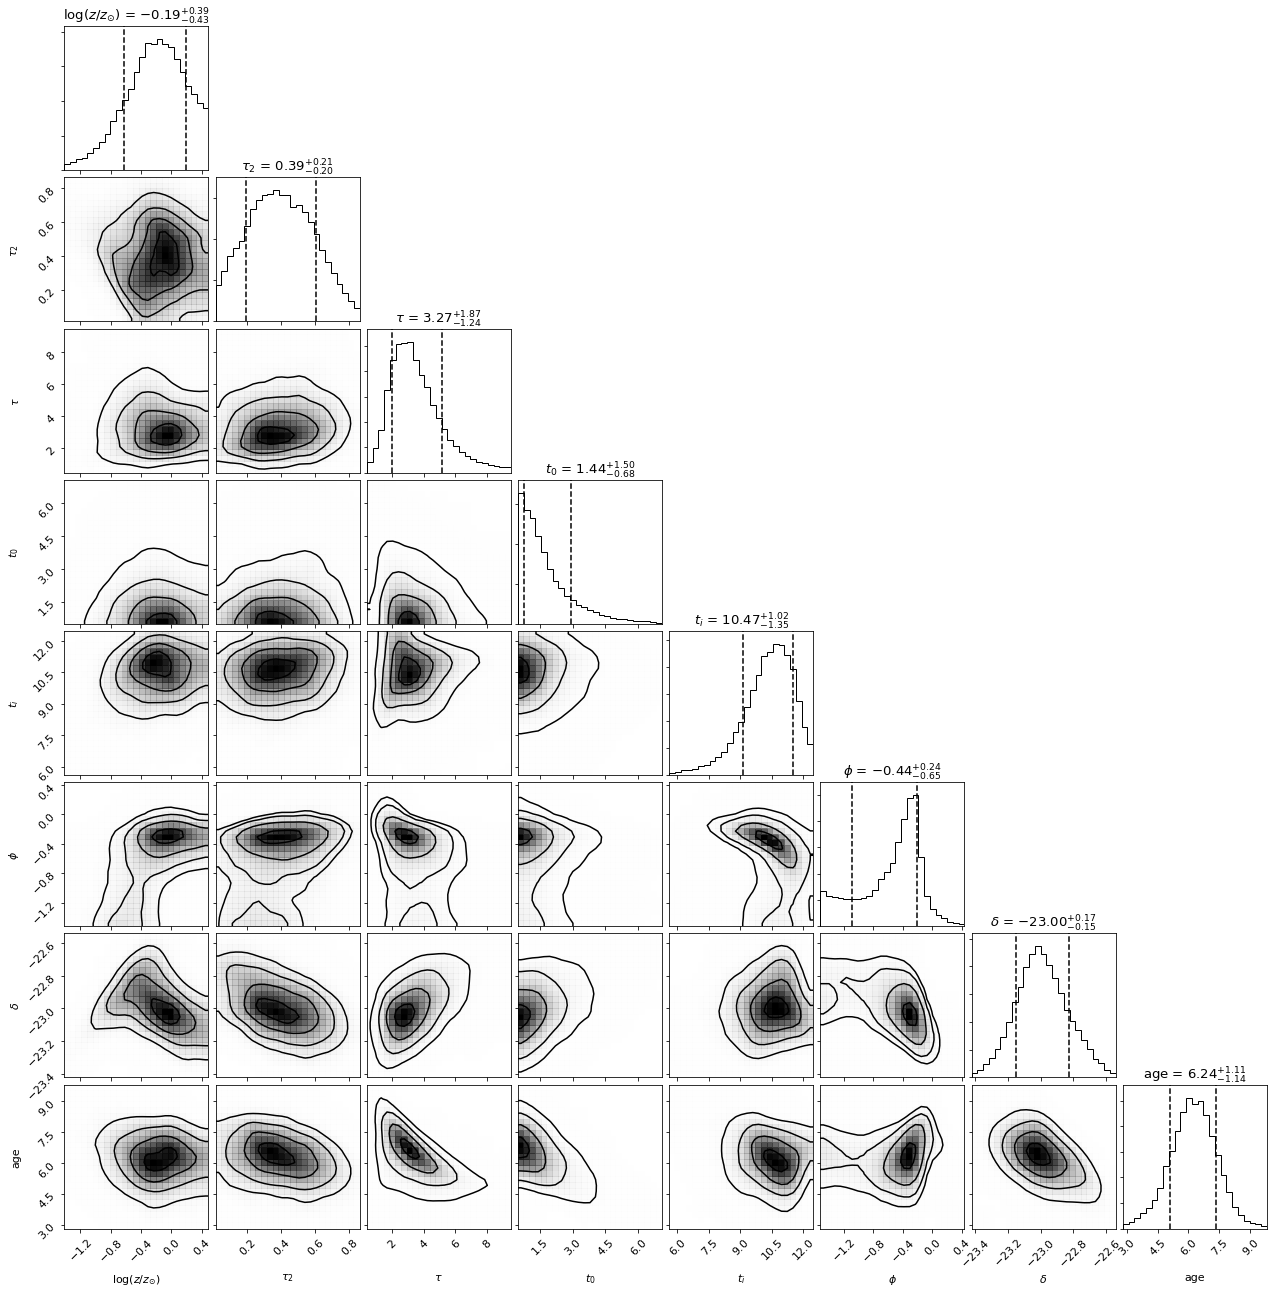

In [9]:
#run one object
SN = 16185
file_ = f'../resources/SN{SN}_campbell_chain.tsv'
saved_file = f'SN{SN}-mcmc-2018-12-21.pdf'
corner_plot(file_, saved_file)

## Messier Objects

In [8]:
# run all Messier objects 
for id in [63, 82, 87, 89, 91, 101, 105, 108]:
    file_ = f'../resources/SN{id}_messier_chain.tsv'
    saved_file = f'messierTests/12-29-M{id}.pdf'
    print(f'\nMaking {saved_file}')
    corner_plot(file_, saved_file)


Making messierTests/12-29-M63.pdf


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Making messierTests/12-29-M82.pdf

Making messierTests/12-29-M87.pdf

Making messierTests/12-29-M89.pdf



Making messierTests/12-29-M91.pdf



Making messierTests/12-29-M101.pdf

Making messierTests/12-29-M105.pdf

Making messierTests/12-29-M108.pdf


In [3]:
# One Messier Object
ID = 63
file_ = f'../resources/SN{ID}_messier_chain.tsv'
saved_file = f'messierTests/12-22-M{ID}.pdf'
print(f'\nMaking {saved_file}')
corner_plot(file_, saved_file)


Making messierTests/12-22-M63.pdf


## Circle Test -- old

In [3]:
# run on circle test 
for id in [1, 2, 3, 4, 5, 6, 7]:
    file_ = f'../resources/SN{id}_chain.tsv'
    saved_file = f'circleTests/12-19-C{id}.pdf'
    print(f'\nMaking {saved_file}')
    corner_plot(file_, saved_file)


Making circleTests/07-31-C1.pdf



Making circleTests/07-31-C2.pdf



Making circleTests/07-31-C3.pdf

Making circleTests/07-31-C4.pdf



Making circleTests/07-31-C5.pdf



Making circleTests/07-31-C6.pdf


In [7]:
# run on circle test 3 with truths
file_ = f'../resources/SN3_chain.tsv'
saved_file = f'circleTests/07-31-C3-truths.pdf'

data = Table.read(file_, format='ascii.commented_header', delimiter='\t')
data = data.to_pandas()
data.dropna(inplace=True)

fig = corner.corner(data, show_titles=True, use_math_text=True,
                quantiles=[0.16, 0.5, 0.84], smooth=0.5, 
                plot_datapoints=False,
                labels=["$logZ_{sol}$", "$dust_2$", r"$\tau$", 
                        "$t_{start}$", "$t_{trans}$", 'sf slope', 
                         'c', 'Age'],
                truths=[-0.5, 0.1, 7.0, 3.0, 10, 15.0, -25, None]
                )

fig.savefig(saved_file)

In [8]:
# run on circle test 1 with truths
file_ = f'../resources/SN1_chain_2017-09-11.tsv'
saved_file = f'circleTests/09-11-C1-truths.pdf'
truths=[-0.5, 0.1, 0.5, 1.5, 9.0, -1.0, -25, None]

corner_plot(file_, saved_file, truths)

# data = Table.read(file_, format='ascii.commented_header', delimiter='\t')
# data = data.to_pandas()
# data.dropna(inplace=True)
#
# fig = corner.corner(data, show_titles=True, use_math_text=True,
#                 quantiles=[0.16, 0.5, 0.84], smooth=0.5, 
#                 plot_datapoints=False,
#                 labels=["$logZ_{sol}$", "$dust_2$", r"$\tau$", 
#                         "$t_{start}$", "$t_{trans}$", 'sf slope', 
#                          'c', 'Age'],
#                 truths=[-0.5, 0.1, 0.5, 1.5, 9.0, -1.0, -25, None]
#                 )

# fig.savefig(saved_file)

## Test all Circle Tests

In [5]:
# for slope
# truths = {
# 1 : [-0.5, 0.1, 0.5, 1.5, 9.0, -1.0, -25, 10.68],
# 2 : [-0.5, 0.1, 0.5, 1.5, 9.0, 15.0, -25, 1.41],
# 3 : [-0.5, 0.1, 7.0, 3.0, 10, 15.0, -25, 1.75],
# 4 : [-0.5, 0.1, 7.0, 3.0, 13.0, 0.0, -25, 4.28],
# 5 : [-1.5, 0.1, 0.5, 1.5, 9.0, -1.0, -25, 10.68],
# 6 : [-0.5, 0.8, 7.0, 3.0, 10.0, 15.0, -25, 1.75],
# 7 : [-0.5, 0.1, 0.5, 1.5,  6.0, 15.0, -25,  ] 
# }

# for phi
truths = {
1 : [-0.5, 0.1, 0.5, 1.5, 9.0, -0.785, -25, 10.68],
2 : [-0.5, 0.1, 0.5, 1.5, 9.0, 1.504, -25, 1.41],
3 : [-0.5, 0.1, 7.0, 3.0, 10, 1.504, -25, 1.75],
4 : [-0.5, 0.1, 7.0, 3.0, 13.0, 0.0, -25, 4.28],
5 : [-1.5, 0.1, 0.5, 1.5, 9.0, -0.785, -25, 10.68],
6 : [-0.5, 0.8, 7.0, 3.0, 10.0, 1.504, -25, 1.75],
7 : [-0.5, 0.1, 0.5, 1.5,  6.0, 1.504, -25, 2.40],
8 : [-0.5, 0.1, 0.1, 8.0, 12.0, 1.52, -25, 0.437]
}

In [21]:
for id_ in np.arange(8) + 1:
    file_ = f'../resources/SN{id_}_circle_chain.tsv'
    saved_file = f'circleTests/C{id_}-truths-0717.pdf'
    print(f'\nMaking {saved_file}')
    corner_plot(file_, saved_file, truths[id_])


Making circleTests/C1-truths-0717.pdf


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Making circleTests/C2-truths-0717.pdf

Making circleTests/C3-truths-0717.pdf

Making circleTests/C4-truths-0717.pdf

Making circleTests/C5-truths-0717.pdf

Making circleTests/C6-truths-0717.pdf

Making circleTests/C7-truths-0717.pdf

Making circleTests/C8-truths-0717.pdf


In [25]:
# just one cirlce test
id_ = 8
file_ = f'../resources/SN{id_}_circle_chain.tsv'
saved_file = f'circleTests/C{id_}-truths-0717_1.pdf'
corner_plot(file_, saved_file, truths[id_])

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


# Check sections of chain

In [17]:
file_ = f'../resources/SN2_chain.tsv'
saved_file = f'circleTests/C2-3.pdf'
print(f'\nMaking {saved_file}')
corner_plot(file_, saved_file, truths[2], third=3)


Making circleTests/C2-3.pdf
